In [2]:
import os
import pandas as pd
from datetime import datetime, timedelta

def process_file(file_path):
    with open(file_path, 'r') as file:
        # Extracting t0 timestamp
        t0_str = ''
        for line in file:
            if line.startswith('#   t0:'):
                t0_str = line.split()[2]
                break
        
        if t0_str:
            t0 = datetime.fromisoformat(t0_str.replace('Z', '+00:00'))
            # Read and process the data after finding t0
            data = [line.split() for line in file if not line.startswith('#')]
        else:
            return pd.DataFrame()  # Return empty DataFrame if t0 is not found

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Rel Time [s]', 'Back Az [deg]', 'Tr. Velocity [m/s]', 'F-stat'])
    df = df.apply(pd.to_numeric)

    # Convert the first column to datetime
    df['Datetime'] = df['Rel Time [s]'].apply(lambda x: t0 + timedelta(seconds=x))
    df.drop('Rel Time [s]', axis=1, inplace=True)

    return df

# Define the folder path
folder_path = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/raw/I06AU/I06AU_FK_RESULTS'

# List all .DAT files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('fk_results.dat')]

# Process each file and concatenate
all_data = pd.DataFrame()
for file in files:
    file_path = os.path.join(folder_path, file)
    df = process_file(file_path)
    all_data = pd.concat([all_data, df], ignore_index=True)

# Save the combined DataFrame to a CSV file
output_csv_path = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/raw/I06AU/FK_Combined.csv'
all_data.to_csv(output_csv_path, index=False)


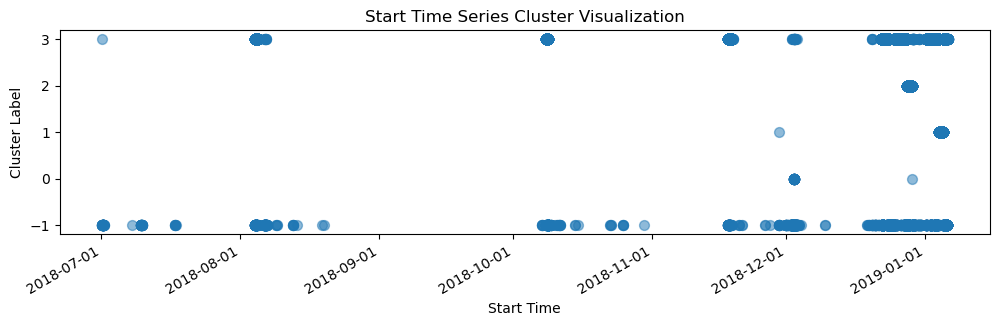

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the clustering results file (only segment_id and cluster)
df_clusters = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/clustering_results/I06H1_HDBSCAN_Clustered.csv')[['segment_id', 'cluster']]

# Load the file with segment_id, starttime, and endtime
df_times = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/Train_Segments.csv')

# Merge the dataframes on segment_id
df_merged = pd.merge(df_clusters, df_times, on='segment_id')

# Convert Start_Time to datetime objects
df_merged['Start_Time'] = pd.to_datetime(df_merged['Start_Time'])

# Plotting
plt.figure(figsize=(12, 3))

# Plot start time for each segment in each cluster
plt.scatter(df_merged['Start_Time'], df_merged['cluster'], alpha=0.5, s=50)

# Formatting the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate() # Rotate the labels for better readability

plt.xlabel('Start Time')
plt.ylabel('Cluster Label')
plt.title('Start Time Series Cluster Visualization')
plt.show()


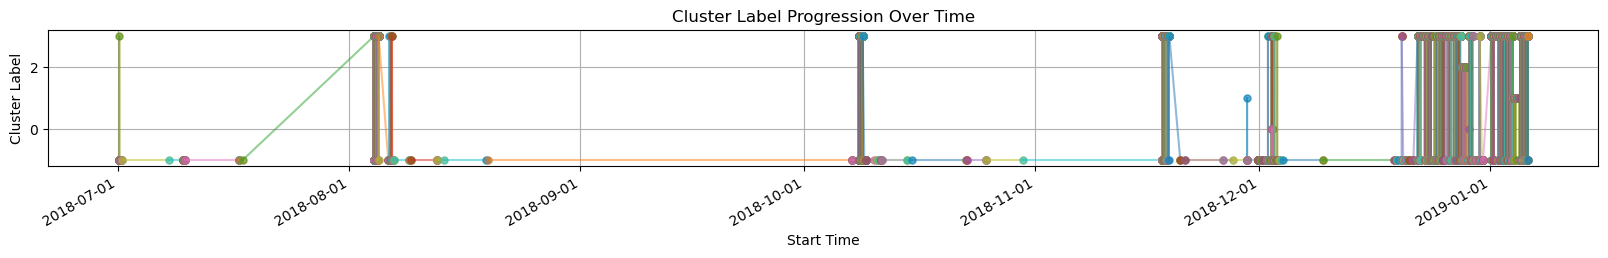

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the clustering results file (only segment_id and cluster)
df_clusters = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/clustering_results/I06H1_HDBSCAN_Clustered.csv')[['segment_id', 'cluster']]

# Filter to include only the first four clusters (0 to 3)
df_clusters = df_clusters[df_clusters['cluster'].isin([-1, 0, 1, 2, 3])]

# Load the file with segment_id, Start_Time, and End_Time
df_times = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/Train_Segments.csv')

# Merge the dataframes on segment_id
df_merged = pd.merge(df_clusters, df_times, on='segment_id')

# Merge the dataframes on segment_id
df_merged = pd.merge(df_clusters, df_times, on='segment_id')

# Convert Start_Time to datetime objects
df_merged['Start_Time'] = pd.to_datetime(df_merged['Start_Time'])

# Sort the dataframe by Start_Time for sequential plotting
df_merged.sort_values(by='Start_Time', inplace=True)

# Plotting
plt.figure(figsize=(20, 2))

# Initialize variables to store previous data point
prev_cluster = None
prev_time = None

# Iterate through each row in the dataframe
for index, row in df_merged.iterrows():
    cluster = row['cluster']
    time = row['Start_Time']
    
    # Connect data points with lines
    if prev_cluster is not None and prev_time is not None:
        plt.plot([prev_time, time], [prev_cluster, cluster], marker='o', markersize=5, alpha=0.5)
    
    # Update previous data point
    prev_cluster = cluster
    prev_time = time

# Formatting the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate() # Rotate the labels for better readability

plt.xlabel('Start Time')
plt.ylabel('Cluster Label')
plt.title('Cluster Label Progression Over Time')
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
df_clusters = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/clustering_results/I06AU_PCA_C2_HDBSCAN_Clustered.csv')[['segment_id', 'cluster']]
cluster_counts = df_clusters['cluster'].value_counts()
print(cluster_counts)

 8    218744
-1      2263
 3         8
 2         3
 4         3
 5         2
 9         2
 0         2
 1         2
 6         2
 7         2
Name: cluster, dtype: int64


In [13]:
import pandas as pd
df_clusters = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/clustering_results/I06AU_PCA_C3_HDBSCAN_Clustered.csv')[['segment_id', 'cluster']]
cluster_counts = df_clusters['cluster'].value_counts()
print(cluster_counts)

 1    220061
-1       965
 0         4
 2         3
Name: cluster, dtype: int64


/tmp/ipykernel_2102872/3142571319.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


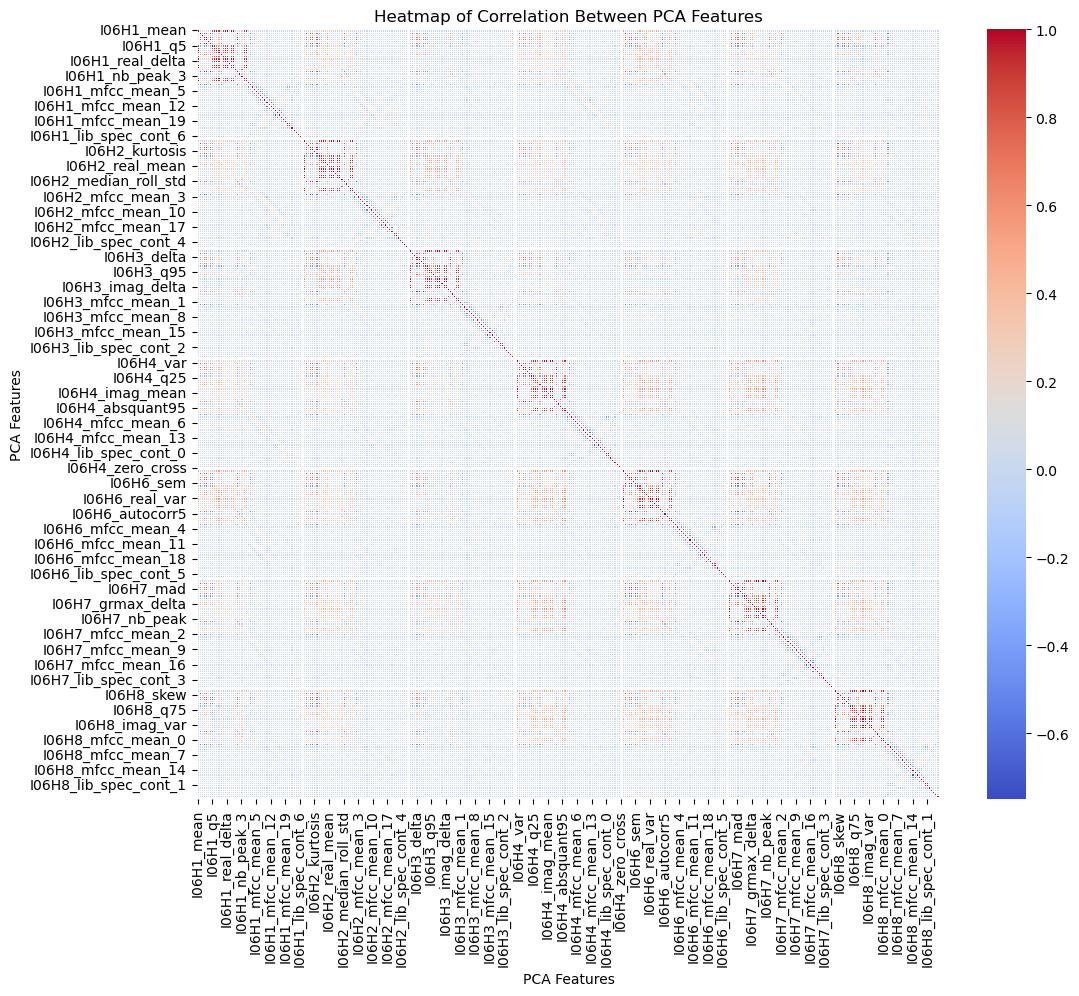

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your PCA features from CSV
df = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/features/train_df.csv')

# Optional: If you have a target variable, append it to the dataframe
# target = pd.read_csv('path_to_your_target_csv.csv')
# df = df.join(target)

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)

# Add titles and labels for clarity
plt.title('Heatmap of Correlation Between Features')
plt.xlabel('Singal Features')
plt.ylabel('Signal Features')

# Show the plot
plt.show()


In [14]:
def plot_detection_availability(dataframes, labels, colors, start_date, end_date, title='Combined Gantt Chart', bar_height=0.4):
    """
    Plots a combined Gantt chart for multiple DataFrames within the specified date range.
    
    Parameters:
    dataframes (list of pandas.DataFrame): List of DataFrames containing the data to plot. Each must contain 'StartTime' and 'EndTime'.
    labels (list of str): List of labels for the dataframes.
    colors (list of str): List of colors for the Gantt bars of each dataframe.
    start_date (str or datetime-like): Start of the date range for plotting.
    end_date (str or datetime-like): End of the date range for plotting.
    title (str): Title of the plot.
    bar_height (float): The height of the bars in the Gantt chart.
    """
    # Ensure the start and end dates are datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Create the plot
    fig, ax = plt.subplots(figsize=(15, len(dataframes) * bar_height * 2))

    # Plot each dataframe as a separate Gantt chart
    for i, (df, label, color) in enumerate(zip(dataframes, labels, colors)):
        # Filter the DataFrame for the specified date range
        df_filtered = df[(df['StartTime'] >= start_date) & (df['EndTime'] <= end_date)]

        # Plot each row as a bar in the Gantt chart
        y_pos = i  # Set y-position for the bars
        for _, row in df_filtered.iterrows():
            ax.barh(y=y_pos, left=row['StartTime'], width=(row['EndTime'] - row['StartTime']), height=bar_height, color=color, label=label)

    # Format the x-axis to show the dates better
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xticks(rotation=90)

    # Set the title and labels
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_yticks(range(len(dataframes)))
    ax.set_yticklabels(labels)

    # Set limits for x-axis to match the specified date range
    ax.set_xlim(start_date, end_date)

    # Show grid only for x-axis
    ax.xaxis.grid(True)
    ax.yaxis.grid(False)

    # Create a legend for the labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicate labels
    plt.legend(by_label.values(), by_label.keys())

    # Show the plot
    plt.tight_layout()
    plt.show()


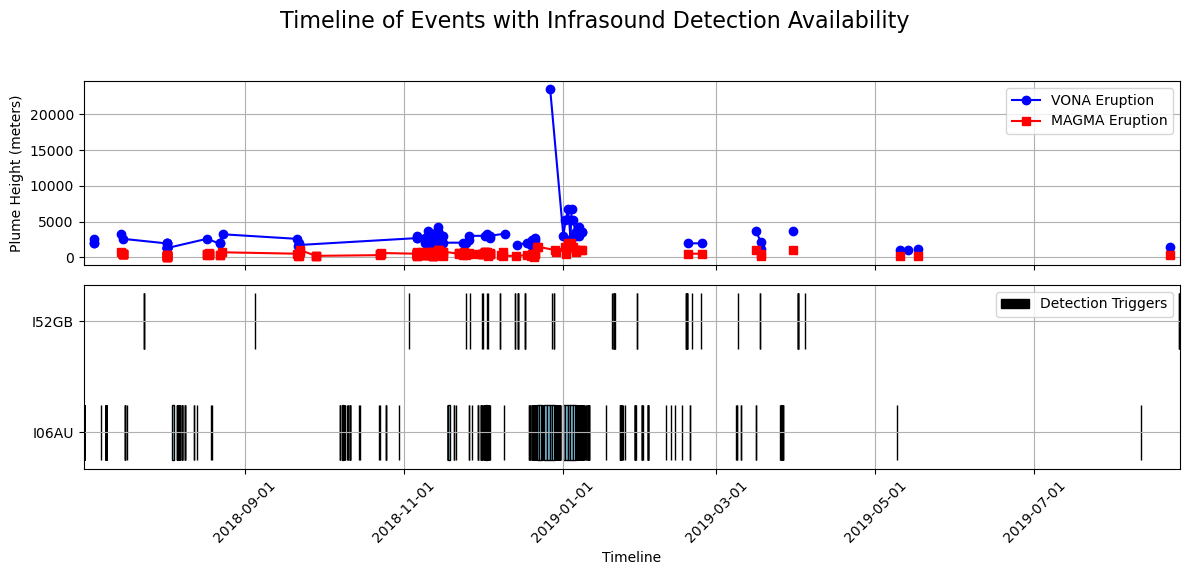

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.patches import Patch


# Reading the data
vona_data = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/VONA_RAW.csv')
magma_data = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/MAGMA_InformasiLetusan_Data.csv')
data_1 = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/raw/I06AU/I06AU_Detection_Availability.csv')
data_2 = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/raw/I52GB/I52GB_Detection_Availability.csv')

# Convert 'Issued', 'UTCDateTime', 'StartTime', and 'EndTime' columns to datetime format
vona_data['Issued'] = pd.to_datetime(vona_data['Issued'], utc=True)
magma_data['UTCDateTime'] = pd.to_datetime(magma_data['UTCDateTime'], utc=True)
data_1['StartTime'] = pd.to_datetime(data_1['StartTime'], utc=True)
data_1['EndTime'] = pd.to_datetime(data_1['EndTime'], utc=True)
data_2['StartTime'] = pd.to_datetime(data_2['StartTime'], utc=True)
data_2['EndTime'] = pd.to_datetime(data_2['EndTime'], utc=True)

# Define your date range for plotting (ensure the timestamps are timezone aware)
start_plot_date = pd.Timestamp('2018-07-01', tz='UTC')
end_plot_date = pd.Timestamp('2019-09-02', tz='UTC')

# Filter datasets based on the defined date range
vona_data = vona_data[(vona_data['Issued'] >= start_plot_date) & (vona_data['Issued'] <= end_plot_date)]
magma_data = magma_data[(magma_data['UTCDateTime'] >= start_plot_date) & (magma_data['UTCDateTime'] <= end_plot_date)]
data_1 = data_1[(data_1['StartTime'] >= start_plot_date) & (data_1['EndTime'] <= end_plot_date)]
data_2 = data_2[(data_2['StartTime'] >= start_plot_date) & (data_2['EndTime'] <= end_plot_date)]

# Create a figure with multiple subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Plot VONA and MAGMA data with markers
ax1.plot(vona_data['Issued'], vona_data['Volcanic Cloud Height (M)'], color='blue', marker='o', label='VONA Eruption')
ax1.plot(magma_data['UTCDateTime'], magma_data['Height'], color='red', marker='s', label='MAGMA Eruption')
ax1.set_ylabel('Plume Height (meters)')
ax1.legend()
ax1.grid(True)

# Function to plot tasks as horizontal bars for Gantt Chart with adjusted bar height
def plot_gantt_tasks(ax, data, row, color, label, bar_height=0.4):
    for _, task in data.iterrows():
        start = task['StartTime']
        end = task['EndTime']
        ax.barh(row, end - start, left=start, height=bar_height, color=color, edgecolor='black')

# Plot Gantt Chart for each dataset
plot_gantt_tasks(ax2, data_1, 0.5, 'skyblue', 'I06AU', bar_height=0.05)
plot_gantt_tasks(ax2, data_2, 0.6, 'salmon', 'I52GB', bar_height=0.05)
ax2.set_yticks([0.5, 0.6])
ax2.set_yticklabels(['I06AU', 'I52GB'])
ax2.grid(True)

# Add a legend for the Gantt chart
detection_trigger_patch = Patch(color='black', label='Detection Triggers')
ax2.legend(handles=[detection_trigger_patch], loc='upper right')

# Set labels, titles, and format the x-axis
ax2.set_xlabel('Timeline')
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)
plt.tight_layout()

# Set the title for the entire plot
fig.suptitle('Timeline of Events with Infrasound Detection Availability', fontsize=16)

# Adjust layout to accommodate the title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [35]:
data = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/raw/I06AU/FK_Combined.csv')

In [34]:
df.head()

,Back Az [deg],Tr. Velocity [m/s],F-stat,Datetime
0,53.461972,443.947988,1.535883,2018-08-01 04:02:25+00:00
1,51.681885,467.651142,1.837083,2018-08-01 04:02:30+00:00
2,54.974486,391.453733,1.796953,2018-08-01 04:02:35+00:00
3,58.185123,365.937745,1.535487,2018-08-01 04:02:40+00:00
4,51.496755,325.593115,1.600156,2018-08-01 04:02:45+00:00


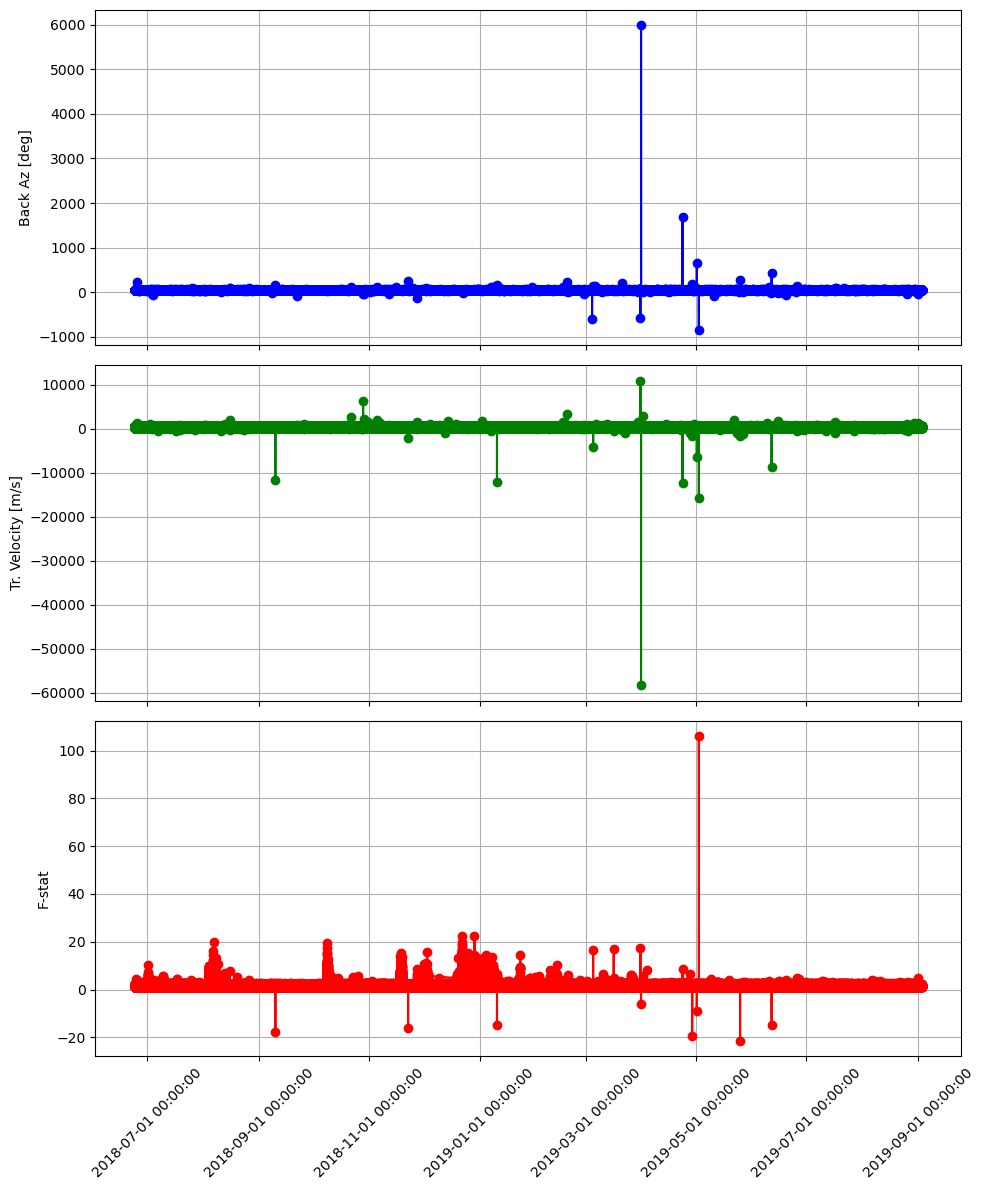

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sample data for demonstration purposes
# Replace this with your actual data

# Convert 'Datetime' to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

# Plot each column in its own subplot
axes[0].plot(data['Datetime'], data['Back Az [deg]'], color='blue', marker='o')
axes[0].set_ylabel('Back Az [deg]')
axes[0].grid(True)

axes[1].plot(data['Datetime'], data['Tr. Velocity [m/s]'], color='green', marker='o')
axes[1].set_ylabel('Tr. Velocity [m/s]')
axes[1].grid(True)

axes[2].plot(data['Datetime'], data['F-stat'], color='red', marker='o')
axes[2].set_ylabel('F-stat')
axes[2].grid(True)

# Format the x-axis to display dates
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the detection results
detection_df = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/raw/I06AU/I06AU_Detection_Availability.csv')
detection_df['StartTime'] = pd.to_datetime(detection_df['StartTime'])
detection_df['EndTime'] = pd.to_datetime(detection_df['EndTime'])

# Convert detection results into a list of tuples
detections = list(zip(detection_df['StartTime'], detection_df['EndTime']))


def plot_fk2(df, detections=detections, title=None, output_path=None, show_fig=True):
    '''
    Visualize beamforming (fk) results without waveform data
    Parameters:
    df: DataFrame with columns 'Datetime', 'Back Az [deg]', 'Tr. Velocity [m/s]', 'F-stat'
    detections: Optional. List of tuples or list with start and end times for detections.
    title: Optional. Title for the plot.
    output_path: Optional. Path to save the plot.
    show_fig: Whether to display the plot.
    '''

    # Extract data from DataFrame
    times = pd.to_datetime(df['Datetime'])
    peaks = df[['Back Az [deg]', 'Tr. Velocity [m/s]', 'F-stat']].values

    f, a = plt.subplots(3, figsize=(10, 6), sharex=True)
    a[2].set_xlabel("Time")
    a[0].set_ylabel("F-stat")    
    a[1].set_ylabel("Tr. Vel. [m/s]")
    a[2].set_ylabel("Back Az. [deg.]")

    a[2].plot(times, peaks[:, 0], '.k', markersize=4)
    a[1].plot(times, peaks[:, 1], '.k', markersize=4)
    a[0].plot(times, peaks[:, 2], '.k', markersize=4)

    if detections:
        for det in detections:
            t1, t2 = det  # Assuming det is a tuple (start_time, end_time)
            for n in range(3):
                a[n].axvspan(t1, t2, color="steelblue")

    if title:
        a[0].set_title(title)
       
    if output_path:
        plt.savefig(output_path, dpi=300) 

    if show_fig:
        plt.show()

# Example usage
df = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/raw/I06AU/FK_Combined.csv')
plot_fk2(df)


ValueError: time data "2018-11-02 00:00:39.850000+00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 14370. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

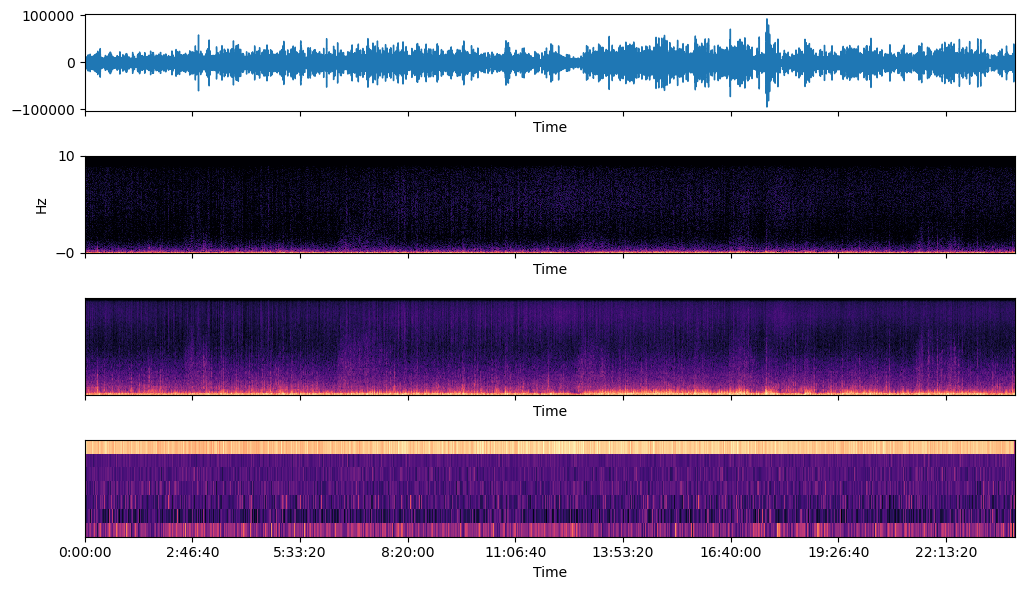

In [4]:
from obspy import read
import matplotlib.pyplot as plt
import numpy as np
import librosa
import scipy

# Assuming 'stream' is your ObsPy Stream object
stream = read('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/raw/I06AU/I06AU_SAC/IM.I06H1..BDF__20190105T000000Z__20190106T000000Z.sac')
trace = stream[0]

# Define your figure and axes with shared x-axis
fig, axes = plt.subplots(4, 1, figsize=(12, 6), sharex='all')

# Plot the waveform using librosa.display.waveshow (time domain)
librosa.display.waveshow(trace.data, sr=trace.stats.sampling_rate, ax=axes[0])

# Spectrogram using Librosa
D = np.abs(librosa.stft(trace.data))
DB = librosa.amplitude_to_db(D, ref=np.max)
img = librosa.display.specshow(DB, sr=trace.stats.sampling_rate, y_axis='log', x_axis='time', ax=axes[1])

# Mel spectrogram using Librosa
mel_spectrogram = librosa.feature.melspectrogram(y=trace.data, sr=22050, n_mels=128)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
img = librosa.display.specshow(log_mel_spectrogram, sr=trace.stats.sampling_rate, x_axis='time', ax=axes[2])

# Spectral Contrast
contrast = librosa.feature.spectral_contrast(S=D, sr=22050, n_bands=6,)
img = librosa.display.specshow(contrast, sr=trace.stats.sampling_rate, x_axis='time', ax=axes[3])

# Adjust the layout and spacing
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust this as necessary for your colorbar

# Show the plot
plt.show()

#### 1 Day Plotter

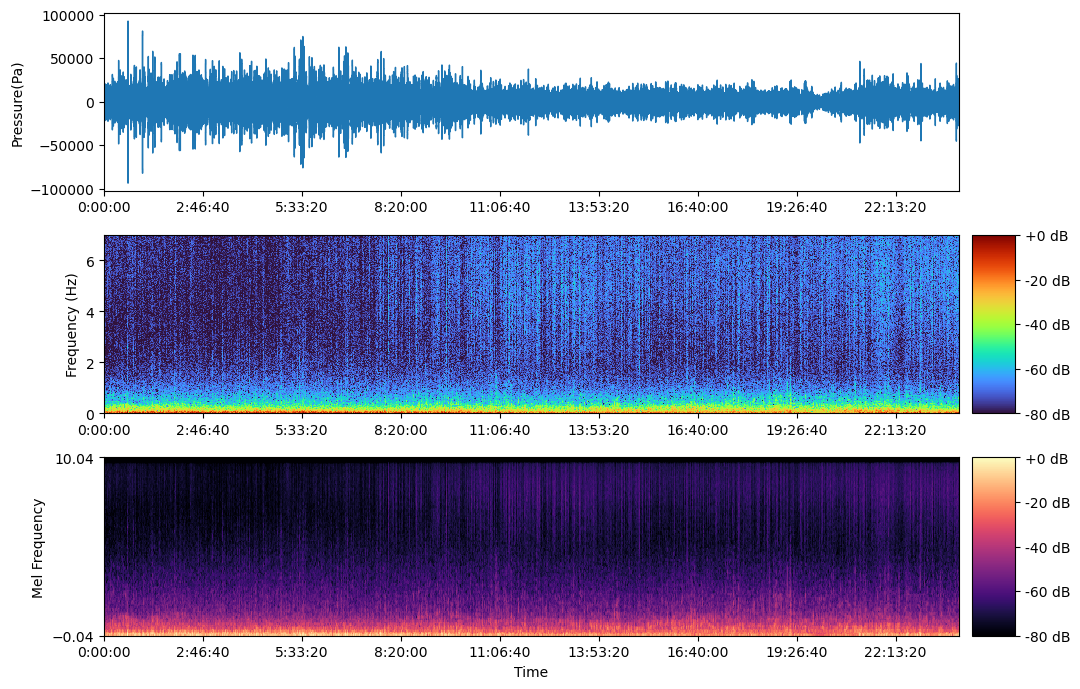

In [14]:
from obspy import read
import matplotlib.pyplot as plt
import numpy as np
import librosa
import scipy
from obspy import UTCDateTime
from matplotlib.dates import DateFormatter

# Assuming 'stream' is your ObsPy Stream object
stream = read('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/raw/I06AU/I06AU_SAC/IM.I06H1..BDF__20181223T000000Z__20181224T000000Z.sac')
trace = stream[0]

# Create a grid for the subplots with 3 rows
fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(3, 2, width_ratios=[1, 0.05])

# Define axes for the waveform, spectrogram, Mel spectrogram, and contrast
ax_waveform = fig.add_subplot(gs[0, 0])
ax_spectrogram = fig.add_subplot(gs[1, 0], sharex=ax_waveform)
ax_mel_spectrogram = fig.add_subplot(gs[2, 0], sharex=ax_waveform)

# Plot the waveform using librosa.display.waveshow (time domain)
librosa.display.waveshow(trace.data, sr=trace.stats.sampling_rate, ax=ax_waveform)
ax_waveform.set_ylabel('Pressure(Pa)')
ax_waveform.set_xlabel('')  # Remove x-axis label
ax_waveform.set_xticks([])  # Remove x-axis ticks with numbers

# Spectrogram using Librosa
D = np.abs(librosa.stft(trace.data))
DB = librosa.amplitude_to_db(D, ref=np.max)
cmap_spec = plt.get_cmap('turbo')  # Change 'viridis' to your desired colormap
img_spec = librosa.display.specshow(DB, sr=trace.stats.sampling_rate, y_axis='linear', x_axis='time', ax=ax_spectrogram, cmap=cmap_spec)
ax_spectrogram.set_ylim(0, 7)
ax_spectrogram.set_ylabel('Frequency (Hz)')
ax_spectrogram.set_xlabel('')  # Remove x-axis label
ax_spectrogram.set_xticks([])  # Remove x-axis ticks with numbers

# Mel spectrogram using Librosa
mel_spectrogram = librosa.feature.melspectrogram(y=trace.data, sr=22050, n_mels=128)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
img_mel = librosa.display.specshow(log_mel_spectrogram, sr=trace.stats.sampling_rate, x_axis='time', y_axis='mel', ax=ax_mel_spectrogram)
ax_mel_spectrogram.set_ylabel('Mel Frequency')
ax_mel_spectrogram.set_xlabel('Time')  # Keep x-axis label for the Mel spectrogram

# Create colorbars for the spectrogram, Mel spectrogram, and contrast
cax_spec = fig.add_subplot(gs[1, 1])
cax_mel = fig.add_subplot(gs[2, 1])

# Add colorbars
cbar_spec = fig.colorbar(img_spec, cax=cax_spec, format="%+2.0f dB")  # Adjust the aspect value as needed
cbar_mel = fig.colorbar(img_mel, cax=cax_mel, format="%+2.0f dB")

# Adjust the layout and spacing
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust this as necessary for your colorbar

# Show the plot
plt.show()


#### 10-Day Plotter

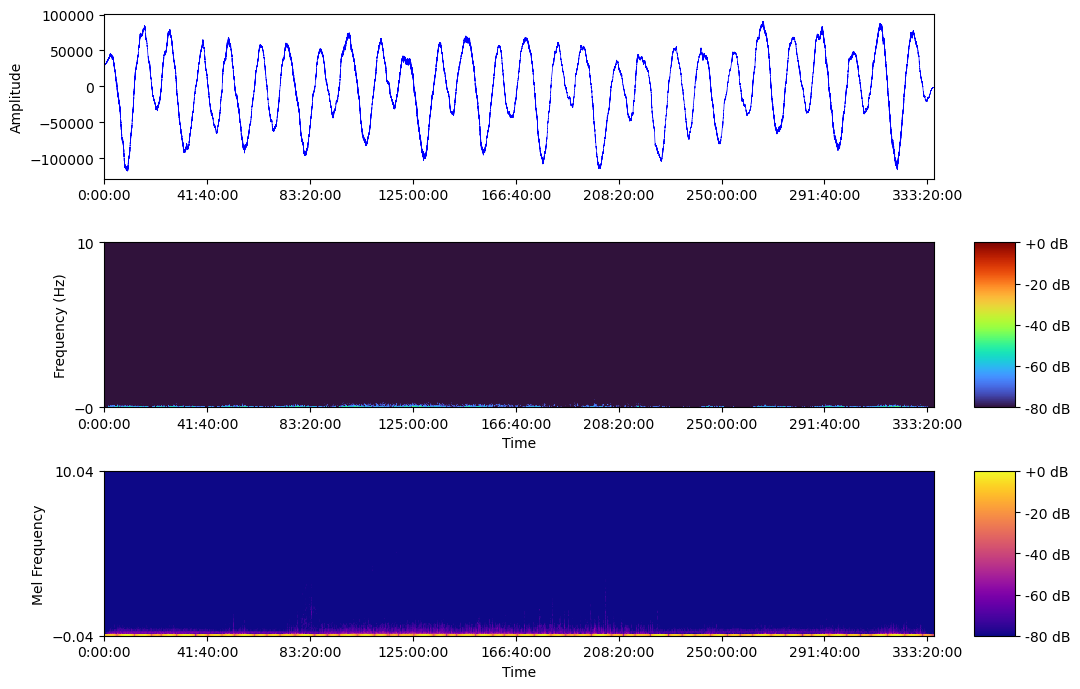

In [6]:
from obspy import read
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Load your ObsPy Stream
stream = read('/run/media/viblab/Markov11/Haykal/Anak_Krakatau_FYP_FIX/Data/VALIDATION/WAVEFORM/IM.I06H1_2018.12.19_00.00.00.sac')
trace = stream[0]

# Apply any filtering or processing as needed
trace.filter('lowpass', freq=7, corners=2, zerophase=True)

# Create a grid for the subplots with 3 rows
fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(3, 2, width_ratios=[1, 0.05])

# Define axes for the waveform, spectrogram, Mel spectrogram, and contrast
ax_waveform = fig.add_subplot(gs[0, 0])
ax_spectrogram = fig.add_subplot(gs[1, 0], sharex=ax_waveform)
ax_mel_spectrogram = fig.add_subplot(gs[2, 0], sharex=ax_waveform)

# Plot the waveform on the specified axes
ax_waveform.plot(trace.times(), trace.data, color='b', linewidth=0.5)
ax_waveform.set_ylabel('Amplitude')

# Spectrogram using Librosa
D = np.abs(librosa.stft(trace.data))
DB = librosa.amplitude_to_db(D, ref=np.max)
cmap_spec = plt.get_cmap('turbo')  # Change 'viridis' to your desired colormap
img_spec = librosa.display.specshow(DB, sr=trace.stats.sampling_rate, y_axis='log', x_axis='time', ax=ax_spectrogram, cmap=cmap_spec)
ax_spectrogram.set_ylabel('Frequency (Hz)')

# Mel spectrogram using Librosa
mel_spectrogram = librosa.feature.melspectrogram(y=trace.data, sr=trace.stats.sampling_rate, n_mels=128)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
cmap_mel = plt.get_cmap('plasma')  # Change 'plasma' to your desired colormap
img_mel = librosa.display.specshow(log_mel_spectrogram, sr=trace.stats.sampling_rate, x_axis='time', y_axis='mel', ax=ax_mel_spectrogram, cmap=cmap_mel)
ax_mel_spectrogram.set_ylabel('Mel Frequency')

# Create colorbars for the spectrogram and Mel spectrogram
cax_spec = fig.add_subplot(gs[1, 1])
cax_mel = fig.add_subplot(gs[2, 1])

# Add colorbars
cbar_spec = fig.colorbar(img_spec, cax=cax_spec, format="%+2.0f dB")
cbar_mel = fig.colorbar(img_mel, cax=cax_mel, format="%+2.0f dB")

# Adjust the layout and spacing
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust this as necessary for your colorbar

# Show the plot
plt.show()


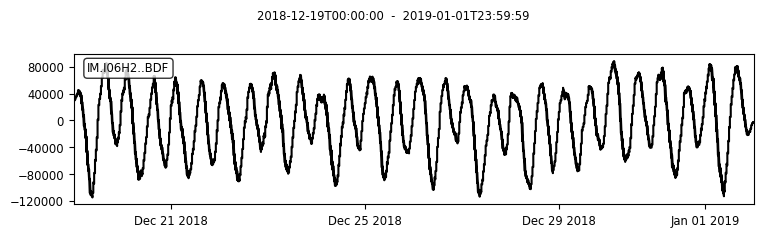

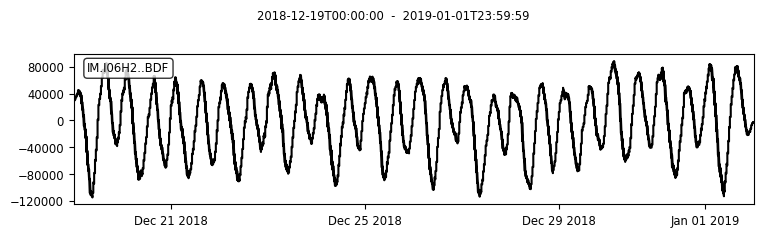

In [9]:
stream = read('/run/media/viblab/Markov11/Haykal/Anak_Krakatau_FYP_FIX/Data/VALIDATION/WAVEFORM/IM.I06H2_2018.12.19_00.00.00.sac')
trace = stream[0]

trace.plot()

In [8]:
import pandas as pd
df_clusters = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/clustering_results/I06H1_HDBSCAN_Clustered.csv')[['segment_id', 'cluster']]
cluster_counts = df_clusters['cluster'].value_counts()
print(cluster_counts)

 3    182457
 1     17247
 2     16732
-1      4558
 0        39
Name: cluster, dtype: int64


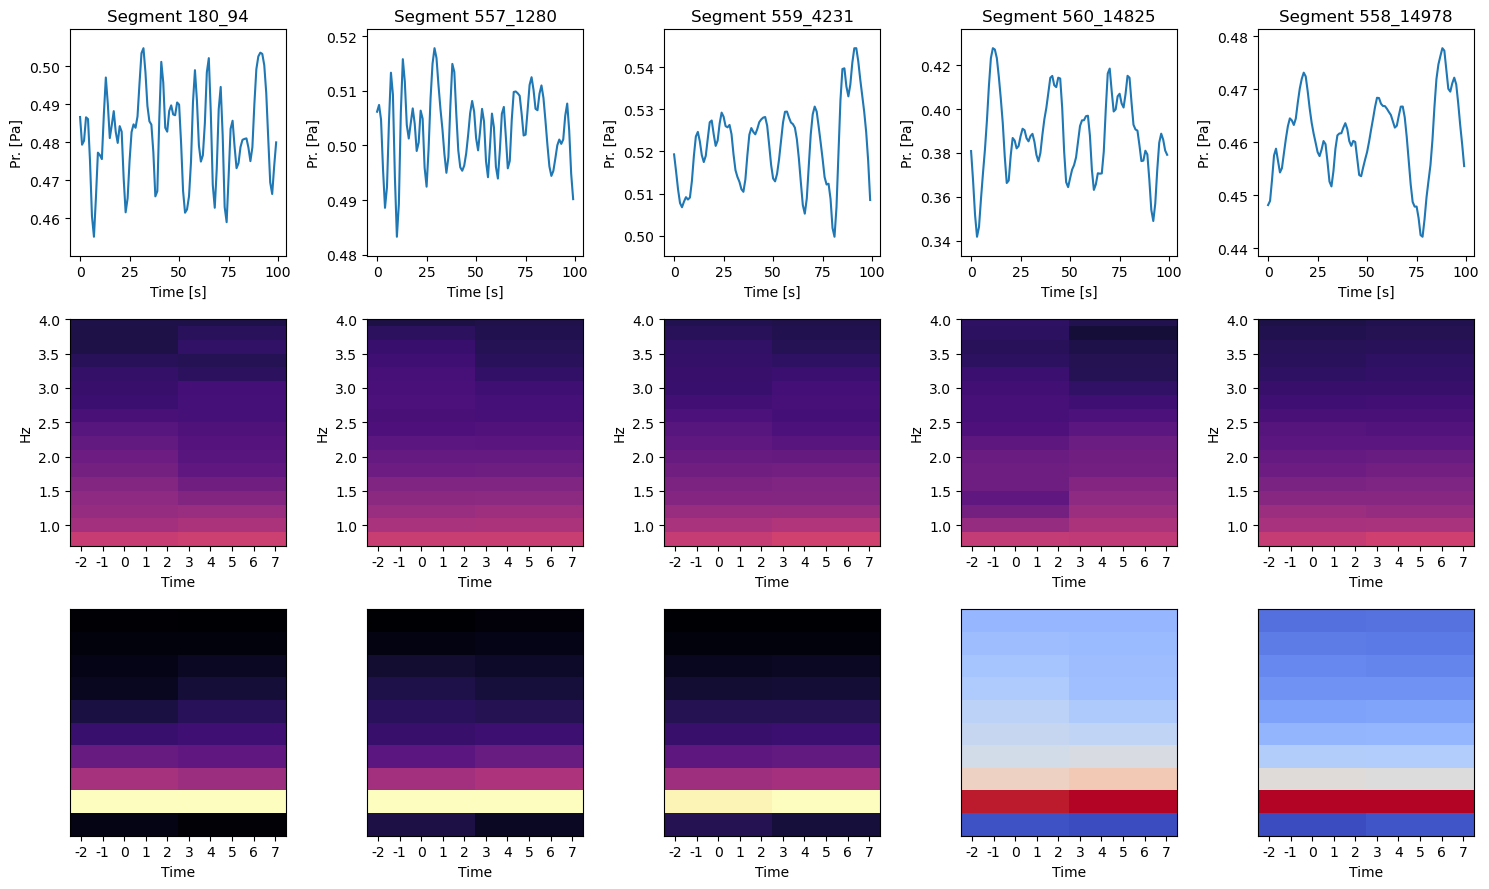

In [42]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
import numpy as np

def load_data(segment_id, station, folder_path):
    file_path = f'{folder_path}/{segment_id}.csv'
    df = pd.read_csv(file_path)
    return df[station].values

# List of segment IDs you want to visualize
segment_ids = ['180_94', '557_1280', '559_4231', '560_14825', '558_14978']  # Replace with actual IDs
station = 'I06H1'
folder_path = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/train'

# Create subplots with 3 rows and 5 columns
fig, axes = plt.subplots(3, 5, figsize=(15, 9), gridspec_kw={'width_ratios': [1] * 5})

for i, segment_id in enumerate(segment_ids):
    data = load_data(segment_id, station, folder_path)
    
    # Calculate the margin for y-axis scaling
    margin = 0.1 * (np.max(data) - np.min(data))
    y_min, y_max = np.min(data) - margin, np.max(data) + margin

    # Waveplot
    axes[0, i].plot(data)
    axes[0, i].set_title(f'Segment {segment_id}')
    axes[0, i].set_ylim([y_min, y_max])
    axes[0, i].set_xlabel('Time [s]')
    axes[0, i].set_ylabel('Pr. [Pa]')

    # Spectrogram
    n_fft = 100  # The window size
    hop_length = 100  # The step size (no overlap)
    S = np.abs(librosa.stft(data, n_fft=n_fft, hop_length=hop_length))
    DB = librosa.amplitude_to_db(S, ref=np.max)
    img = librosa.display.specshow(DB, sr=20, hop_length=hop_length, x_axis='time', y_axis='linear', ax=axes[1, i])
    axes[1, i].set_ylim(0.7, 4)  # Frequency range of interest


    # MFCC
    mfccs = librosa.feature.mfcc(y=data, sr=20, n_fft=n_fft, hop_length=hop_length, n_mfcc=13, n_mels=10, fmax=10)
    librosa.display.specshow(mfccs, sr=20, hop_length=hop_length, x_axis='time', ax=axes[2, i])

    # Set the same aspect ratio for all subplots
    for j in range(3):
        axes[j, i].set_aspect(aspect='auto')

plt.tight_layout()
plt.show()


ValueError: For X (52) and Y (47) with flat shading, A should have shape (46, 51, 3) or (46, 51, 4) or (46, 51) or (2346,), not (46, 51, 2)

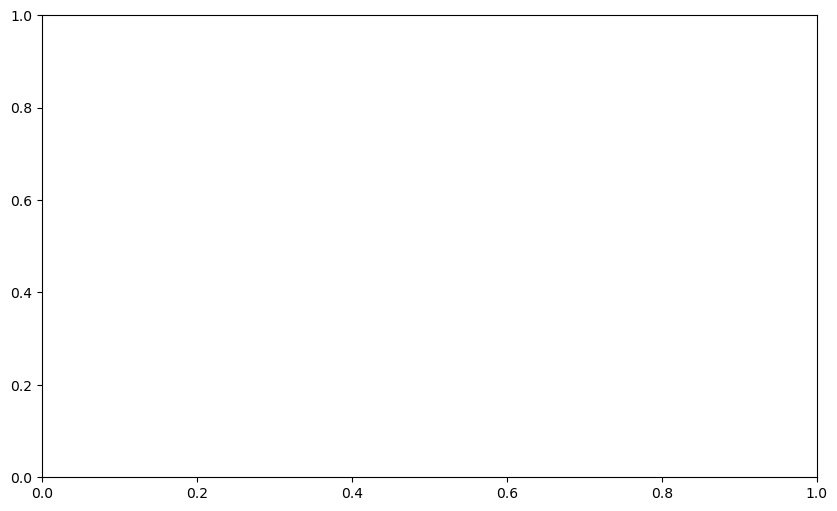

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Sample data (replace with your actual data)
data = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/timeseries/I06H1_TRAIN_FILTER.csv')

# Convert the 'Datetime' column to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Specify the datetime range you want to keep
start_datetime = pd.to_datetime('2018-12-19 03:00:00')
end_datetime = pd.to_datetime('2018-12-20 23:59:59')

# Filter the data based on the datetime range
filtered_data = data[(data['Datetime'] >= start_datetime) & (data['Datetime'] <= end_datetime)]

# Convert the 'I06H1' column to a NumPy ndarray
pressure_data = np.array(filtered_data['I06H1'])

# Create a subplot for the spectrogram
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the spectrogram with a window size of 100 samples (n_fft)
n_fft = 100
hop_length = 100

# Initialize an array for the spectrogram
spectrogram = []

# Iterate through the data and compute spectrogram for each segment
for i in range(0, len(pressure_data), hop_length):
    segment = pressure_data[i:i + n_fft]
    if len(segment) < n_fft:
        # Fill the remaining part with zeros if the segment is shorter than n_fft
        segment = np.pad(segment, (0, n_fft - len(segment)), 'constant')
    
    # Calculate the spectrogram for this segment
    S = np.abs(librosa.stft(segment, n_fft=n_fft, hop_length=hop_length))
    DB = librosa.amplitude_to_db(S, ref=np.max)
    
    # Append the spectrogram to the result
    spectrogram.append(DB)

# Convert the spectrogram to a NumPy ndarray
spectrogram = np.array(spectrogram)

# Plot the spectrogram with datetime on the x-axis
img = librosa.display.specshow(spectrogram, sr=20, hop_length=hop_length, x_axis='time', y_axis='linear', ax=ax, cmap='turbo')
ax.set_ylim(0.7, 4)  # Adjust the frequency range
ax.set_ylabel('Frequency')
ax.set_xlabel('Time')

# Add colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img, cax=cax)

# Set the same aspect ratio for the spectrogram subplot
ax.set_aspect(aspect='auto')

# Show the plot
plt.tight_layout()
plt.show()


ValueError: For X (52) and Y (177256) with flat shading, A should have shape (177255, 51, 3) or (177255, 51, 4) or (177255, 51) or (9040005,), not (177255, 51, 2)

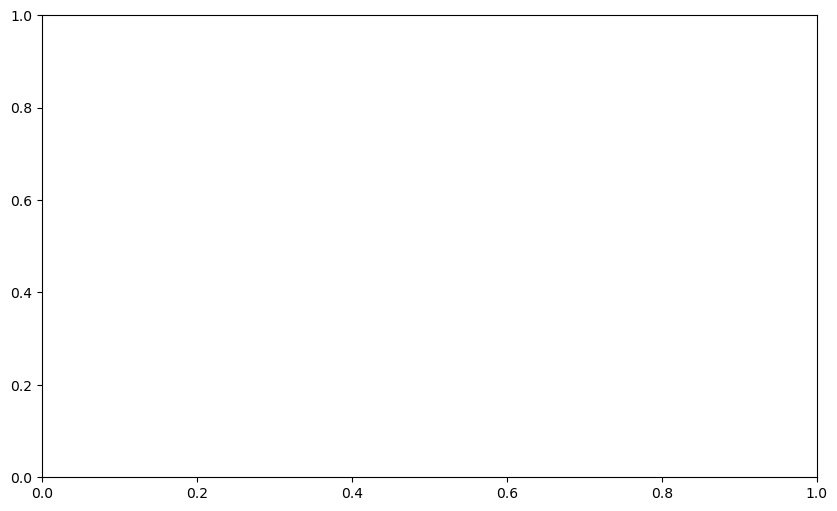

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import numpy as np

# Sample data (replace with your actual data)
data = pd.read_csv('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/timeseries/I06H1_TRAIN_FILTER.csv')

# Convert the 'Datetime' column to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Convert the 'I06H1' column to a NumPy ndarray
pressure_data = np.array(data['I06H1'])

# Create a subplot for the spectrogram
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the spectrogram with a window size of 100 samples (n_fft)
n_fft = 100
hop_length = 100

# Initialize an array for the spectrogram
spectrogram = []

# Iterate through the data and compute spectrogram for each segment
for i in range(0, len(pressure_data), hop_length):
    segment = pressure_data[i:i + n_fft]
    if len(segment) < n_fft:
        # Fill the remaining part with zeros if the segment is shorter than n_fft
        segment = np.pad(segment, (0, n_fft - len(segment)), 'constant')
    
    # Calculate the spectrogram for this segment
    S = np.abs(librosa.stft(segment, n_fft=n_fft, hop_length=hop_length))
    DB = librosa.amplitude_to_db(S, ref=np.max)
    
    # Append the spectrogram to the result
    spectrogram.append(DB)

# Convert the spectrogram to a NumPy ndarray
spectrogram = np.array(spectrogram)

# Plot the spectrogram with datetime on the x-axis
img = librosa.display.specshow(spectrogram, sr=20, hop_length=hop_length, x_axis='time', y_axis='linear', ax=ax, cmap='turbo')
ax.set_ylim(0.7, 4)  # Adjust the frequency range
ax.set_ylabel('Frequency')
ax.set_xlabel('Time')

# Add colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img, cax=cax)

# Set the same aspect ratio for the spectrogram subplot
ax.set_aspect(aspect='auto')

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pandas as pd
import numpy as np

def load_data(segment_id, station, folder_path):
    file_path = f'{folder_path}/{segment_id}.csv'
    df = pd.read_csv(file_path)
    return df[station].values

def plot_waveform(data, title='Waveform'):
    plt.figure(figsize=(10, 3))
    plt.plot(data)
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.show()

def plot_linear_spectrogram(data, sr, title='Linear-Spectrogram'):
    plt.figure(figsize=(5, 6))
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

def plot_mel_spectrogram(data, sr, title='Mel-Spectrogram'):
    plt.figure(figsize=(5, 5))
    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    mel_db = librosa.amplitude_to_db(abs(mel))
    librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

def plot_mfcc(data, sr, title='MFCC'):
    plt.figure(figsize=(5, 5))
    mfccs = librosa.feature.mfcc(y=data, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(title)
    plt.show()

def plot_spectral_contrast(data, sr, title='Spectral Contrast'):
    plt.figure(figsize=(5, 5))
    contrast = librosa.feature.spectral_contrast(y=data, sr=sr)
    librosa.display.specshow(contrast, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(title)
    plt.show()



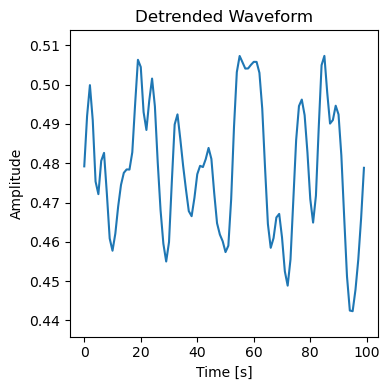

In [12]:
# Define the segment_id, station, and folder path
segment_id = '336_30'  # Replace with your segment_id
station = 'I06H1'  # Replace with your station
folder_path = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWS/data/train'  # Replace with the path to your folder

# Load the data
data = load_data(segment_id, station, folder_path)

margin = 0.1 * (np.max(data) - np.min(data))
y_min, y_max = np.min(data) - margin, np.max(data) + margin

plt.figure(figsize=(4, 4))
plt.plot(data)
plt.title('Detrended Waveform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.ylim([y_min, y_max])  # Set the y-axis limits to the range of the data with a margin

plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

/tmp/ipykernel_2905779/3376484715.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


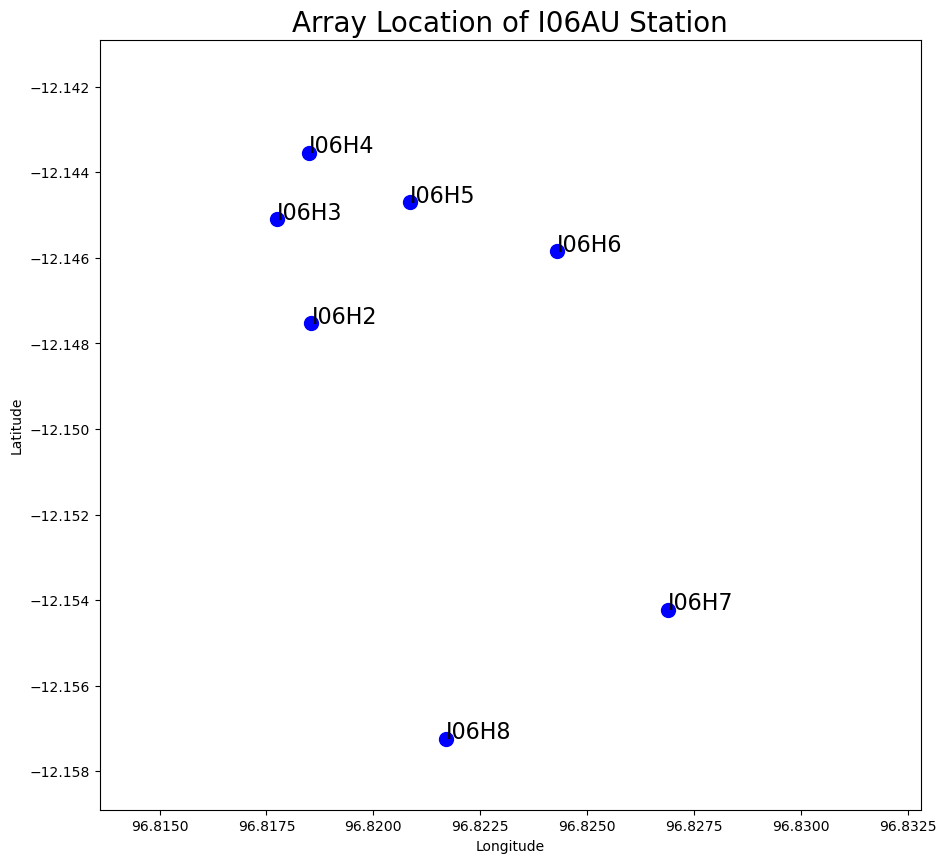

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Reading the data
file_path = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWSFinal/gmap-stations (1).txt'  # Replace with your file path
data = pd.read_csv(file_path, sep='|', header=0, comment='#', names=['Network', 'Station', 'Latitude', 'Longitude', 'Elevation', 'Sitename', 'StartTime', 'EndTime'], skiprows=1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

# Load a map of the world for plotting
world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Setting specific zoom bounds
min_lat, max_lat = -12.1589, -12.1409
min_long, max_long = 96.8136, 96.8328

# Plotting with the specified zoom and annotations
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, color='blue', marker='o', markersize=100)

# Adding labels for each point
for idx, row in gdf.iterrows():
    ax.text(row['Longitude'], row['Latitude'], row['Station'], fontsize=16)

# Setting the bounds for the specified zoom area
ax.set_xlim(min_long, max_long)
ax.set_ylim(min_lat, max_lat)

plt.title("Array Location of I06AU Station",fontsize = 20)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [16]:
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from obspy import read, Stream
from obspy.geodetics import gps2dist_azimuth



# Files (fmt: SAC)
st = read('/run/media/viblab/Markov2/Haykal/AnakKrakatauEWSFinal/Visualization/07_09/IM.I06H*..BDF__20180709T000000Z__20180710T000000Z.sac')
st.stats.npts




AttributeError: 'Stream' object has no attribute 'stats'

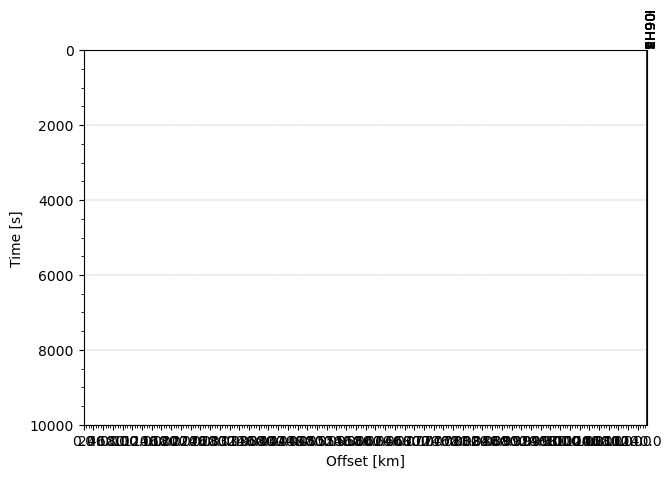

In [10]:
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from obspy import read, Stream
from obspy.geodetics import gps2dist_azimuth


host = '/run/media/viblab/Markov2/Haykal/AnakKrakatauEWSFinal/Visualization/07_09/'
# Files (fmt: SAC)
files = ['IM.I06H1..BDF__20180709T000000Z__20180710T000000Z.sac',
         'IM.I06H2..BDF__20180709T000000Z__20180710T000000Z.sac',
         'IM.I06H3..BDF__20180709T000000Z__20180710T000000Z.sac',
         'IM.I06H4..BDF__20180709T000000Z__20180710T000000Z.sac',
         'IM.I06H5..BDF__20180709T000000Z__20180710T000000Z.sac',
         'IM.I06H6..BDF__20180709T000000Z__20180710T000000Z.sac',
         'IM.I06H7..BDF__20180709T000000Z__20180710T000000Z.sac',
         'IM.I06H8..BDF__20180709T000000Z__20180710T000000Z.sac']

# Earthquakes' epicenter
eq_lat = -6.102
eq_lon = 105.423

# Reading the waveforms
st = Stream()
for waveform in files:
    st += read(host + waveform)

# Calculating distance from SAC headers lat/lon
# (trace.stats.sac.stla and trace.stats.sac.stlo)
for tr in st:
    tr.stats.distance = gps2dist_azimuth(tr.stats.sac.stla, tr.stats.sac.stlo,
                                         eq_lat, eq_lon)[0]
    # Setting Network name for plot title
    tr.stats.network = 'IM'

st.filter('bandpass', freqmin=0.7, freqmax=4)

# Do the section plot..
# If no customization is done after the section plot command, figure
# initialization can be left out and also option ".., show=False, fig=fig)" can
# be omitted, and figure is shown automatically
fig = plt.figure()
st.plot(type='section', plot_dx=20e3, recordlength=10000,
        time_down=True, linewidth=.25, grid_linewidth=.25, show=False, fig=fig)

# Plot customization: Add station labels to offset axis
ax = fig.axes[0]
transform = blended_transform_factory(ax.transData, ax.transAxes)
for tr in st:
    ax.text(tr.stats.distance / 1e3, 1.0, tr.stats.station, rotation=270,
            va="bottom", ha="center", transform=transform, zorder=10)
plt.show()


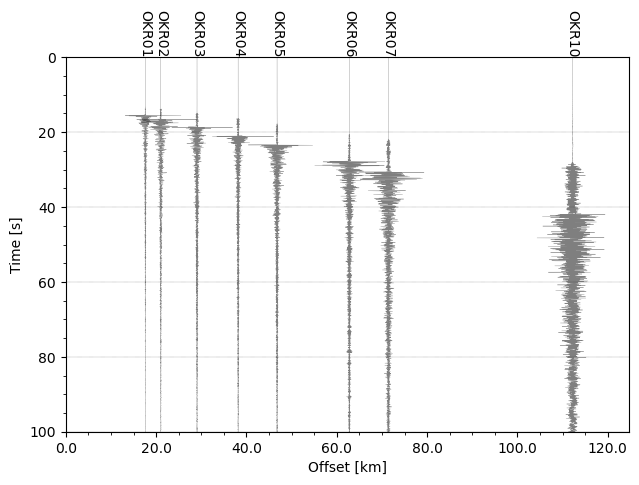

In [17]:
import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from obspy import read, Stream
from obspy.geodetics import gps2dist_azimuth


host = 'https://examples.obspy.org/'
# Files (fmt: SAC)
files = ['TOK.2011.328.21.10.54.OKR01.HHN.inv',
         'TOK.2011.328.21.10.54.OKR02.HHN.inv',
         'TOK.2011.328.21.10.54.OKR03.HHN.inv',
         'TOK.2011.328.21.10.54.OKR04.HHN.inv',
         'TOK.2011.328.21.10.54.OKR05.HHN.inv',
         'TOK.2011.328.21.10.54.OKR06.HHN.inv',
         'TOK.2011.328.21.10.54.OKR07.HHN.inv',
         'TOK.2011.328.21.10.54.OKR10.HHN.inv']
# Earthquakes' epicenter
eq_lat = 35.565
eq_lon = -96.792

# Reading the waveforms
st = Stream()
for waveform in files:
    st += read(host + waveform)

# Calculating distance from SAC headers lat/lon
# (trace.stats.sac.stla and trace.stats.sac.stlo)
for tr in st:
    tr.stats.distance = gps2dist_azimuth(tr.stats.sac.stla, tr.stats.sac.stlo,
                                         eq_lat, eq_lon)[0]
    # Setting Network name for plot title
    tr.stats.network = 'TOK'

st.filter('bandpass', freqmin=0.1, freqmax=10)

# Do the section plot..
# If no customization is done after the section plot command, figure
# initialization can be left out and also option ".., show=False, fig=fig)" can
# be omitted, and figure is shown automatically
fig = plt.figure()
st.plot(type='section', plot_dx=20e3, recordlength=100,
        time_down=True, linewidth=.25, grid_linewidth=.25, show=False, fig=fig)

# Plot customization: Add station labels to offset axis
ax = fig.axes[0]
transform = blended_transform_factory(ax.transData, ax.transAxes)
for tr in st:
    ax.text(tr.stats.distance / 1e3, 1.0, tr.stats.station, rotation=270,
            va="bottom", ha="center", transform=transform, zorder=10)
plt.show()
